In [9]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

import matplotlib.pyplot as plt


In [5]:
# get the current version of tensor flow and keras
print("TensorFlow version: ", tf.__version__)
print("Keras version: ", keras.__version__)


TensorFlow version:  2.11.0
Keras version:  2.11.0


In [7]:


# load the dataset from keras
mnist = keras.datasets.mnist # 28x28 images of handwritten digits 0-9
# divide the dataset into training and testing
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# scale the images  to 0-1
train_images = train_images / 255.0
test_images = test_images / 255.0

# create the model
model = keras.Sequential([  
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
print (model.summary())

# compile the model
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',         
                metrics=['accuracy'])

# train the model
model.fit(train_images, train_labels, epochs=5)

# evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

# make predictions
predictions = model.predict(test_images)
print(predictions[0])
print(np.argmax(predictions[0]))
print(test_labels[0])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5


2023-02-17 01:06:52.584786: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 4s 2ms/step - loss: 0.2591 - accuracy: 0.9275
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1128 - accuracy: 0.9667
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0760 - accuracy: 0.9768
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0563 - accuracy: 0.9826
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.0768 - accuracy: 0.9760
Test accuracy: 0.9760000109672546
Test loss: 0.0768214613199234
 90/313 [=======>......................] - ETA: 0s

2023-02-17 01:07:12.898563: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 0s 1ms/step
[5.0913417e-07 1.1753192e-09 1.3545309e-05 1.5336533e-04 1.6894227e-11
 6.7596162e-08 1.4575260e-12 9.9982786e-01 1.8930108e-06 2.6484097e-06]
7
7


313/313 [==============================] - 0s 1ms/step


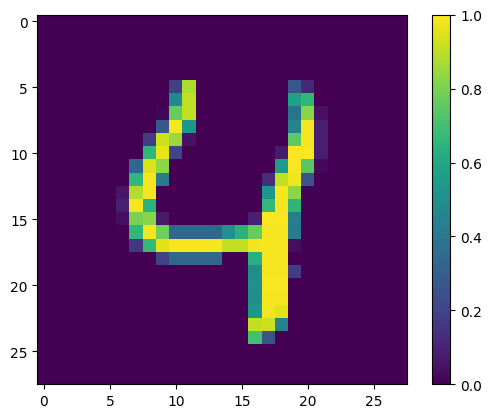

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U12'), dtype('float32')) -> None

In [13]:
# make predictions

predictions = model.predict(test_images)
# define variable to store index
index = 4

# plot the image and the prediction
plt.figure()
plt.imshow(test_images[index])
plt.colorbar()
plt.grid(False)
plt.show()

print("Prediction::"+predictions[index])
print(np.argmax(predictions[index]))
print("Label::"+test_labels[index])
